In [ ]:
# Execução desta célula para análise ou preparação dos dados
# CASE DE VENDAS


In [39]:
# Importação de bibliotecas necessárias para análise e modelagem de séries temporais
# Geração de gráficos para visualização dos dados ou previsões
# Criação de instância da classe StatsForecast para previsão de séries temporais
# Uso do modelo AutoETS (suavização exponencial) para previsão
# Uso do modelo AutoARIMA (método ARIMA automático) para previsão
import pandas as pd
from statsforecast import StatsForecast
from statsforecast.models import AutoETS
from statsforecast.models import AutoARIMA
import matplotlib.pyplot as plt

In [40]:
# Leitura do arquivo CSV com os dados de vendas
df = pd.read_csv(r"C:\Users\renet\Downloads\treinamentos_ia 5\resumo_vendas.csv")
df

,ds,y
0,8/28/2025,404.52
1,8/28/2025,975.68
2,8/28/2025,169.47
3,8/28/2025,5783.64
4,8/28/2025,83.81
...,...,...
27346,1/6/2021,222.11
27347,1/6/2021,45134.00
27348,1/6/2021,689.44
27349,1/6/2021,47701.01


In [41]:
# Conversão da coluna 'ds' para o formato de data
# Agrupamento das vendas por mês
# Reset do índice para manter o DataFrame organizado
df['ds'] = pd.to_datetime(df['ds'])
df_grouped = df.groupby(df['ds'].dt.to_period('M'))['y'].sum().reset_index()
df_grouped['ds'] = df_grouped['ds'].dt.to_timestamp()

In [42]:
# Exibição das primeiras linhas do DataFrame para validação
print(df_grouped.head())

          ds            y
0 2021-01-01   3632707.42
1 2021-02-01  12812183.31
2 2021-03-01  21306031.44
3 2021-04-01   2329599.24
4 2021-05-01   9424709.03


In [43]:
# Execução desta célula para análise ou preparação dos dados
df_grouped['unique_id'] = 'serie1'
df_grouped = df_grouped[['unique_id', 'ds', 'y']]

In [44]:
# Criação de instância da classe StatsForecast para previsão de séries temporais
# Uso do modelo AutoETS (suavização exponencial) para previsão
sf = StatsForecast(
    models=[AutoETS(season_length=12)],
    freq='ME',
    n_jobs=-1
)

In [45]:
# Treinamento do(s) modelo(s) com os dados fornecidos
# Geração de previsões usando o modelo treinado
sf.fit(df_grouped)
forecast = sf.predict(h=29)

In [46]:
# Exibição das primeiras linhas do DataFrame para validação
print(forecast.head())

  unique_id         ds       AutoETS
0    serie1 2025-08-31  5.921026e+06
1    serie1 2025-09-30  1.104504e+07
2    serie1 2025-10-31  1.341850e+07
3    serie1 2025-11-30  9.136039e+06
4    serie1 2025-12-31  1.439422e+07


In [47]:
# Execução desta célula para análise ou preparação dos dados
# histórico
history = df_grouped.copy()

In [48]:
# Execução desta célula para análise ou preparação dos dados

# renomear para combinar depois
history = history.rename(columns={'y': 'valor_real'})

In [49]:
# Uso do modelo AutoETS (suavização exponencial) para previsão

# juntar histórico e previsão
resultados = pd.concat([
    history[['ds', 'valor_real']],
    forecast.rename(columns={'AutoETS': 'previsao'})
], axis=0)

In [50]:
# Impressão de resultados ou informações
print(resultados.tail(20))

           ds  valor_real unique_id      previsao
9  2026-05-31         NaN    serie1  1.032537e+07
10 2026-06-30         NaN    serie1  2.557296e+07
11 2026-07-31         NaN    serie1  1.031901e+07
12 2026-08-31         NaN    serie1  5.921026e+06
13 2026-09-30         NaN    serie1  1.104504e+07
14 2026-10-31         NaN    serie1  1.341850e+07
15 2026-11-30         NaN    serie1  9.136039e+06
16 2026-12-31         NaN    serie1  1.439422e+07
17 2027-01-31         NaN    serie1  8.784345e+06
18 2027-02-28         NaN    serie1  1.904513e+07
19 2027-03-31         NaN    serie1  7.609998e+06
20 2027-04-30         NaN    serie1  6.240851e+06
21 2027-05-31         NaN    serie1  1.032537e+07
22 2027-06-30         NaN    serie1  2.557296e+07
23 2027-07-31         NaN    serie1  1.031901e+07
24 2027-08-31         NaN    serie1  5.921026e+06
25 2027-09-30         NaN    serie1  1.104504e+07
26 2027-10-31         NaN    serie1  1.341850e+07
27 2027-11-30         NaN    serie1  9.136039e+06


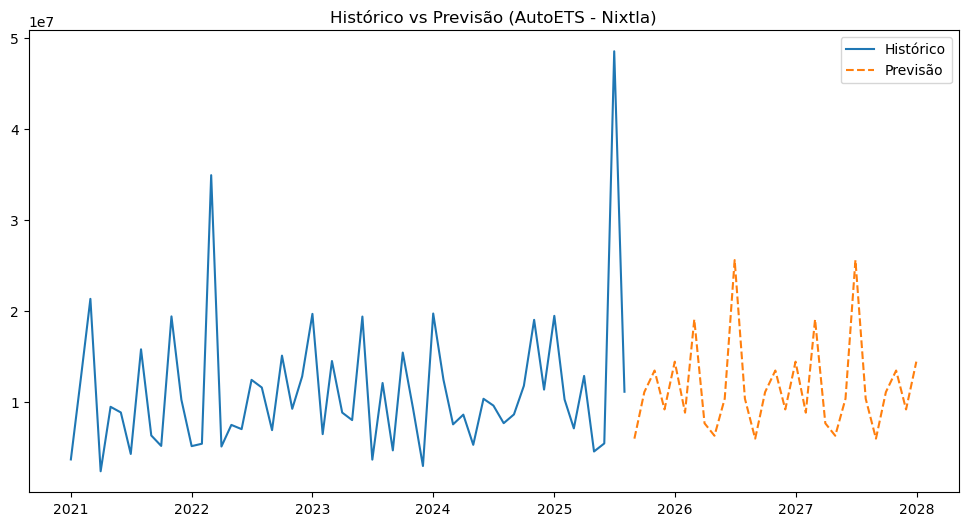

In [51]:
# Geração de gráficos para visualização dos dados ou previsões
# Uso do modelo AutoETS (suavização exponencial) para previsão
plt.figure(figsize=(12,6))
plt.plot(history['ds'], history['valor_real'], label='Histórico')
plt.plot(forecast['ds'], forecast['AutoETS'], label='Previsão', linestyle='--')
plt.legend()
plt.title("Histórico vs Previsão (AutoETS - Nixtla)")
plt.show()

In [52]:
# Uso do modelo AutoETS (suavização exponencial) para previsão
# Impressão de resultados ou informações
previsao_mensal = forecast[['ds', 'AutoETS']]
print(previsao_mensal)


           ds       AutoETS
0  2025-08-31  5.921026e+06
1  2025-09-30  1.104504e+07
2  2025-10-31  1.341850e+07
3  2025-11-30  9.136039e+06
4  2025-12-31  1.439422e+07
5  2026-01-31  8.784345e+06
6  2026-02-28  1.904513e+07
7  2026-03-31  7.609998e+06
8  2026-04-30  6.240851e+06
9  2026-05-31  1.032537e+07
10 2026-06-30  2.557296e+07
11 2026-07-31  1.031901e+07
12 2026-08-31  5.921026e+06
13 2026-09-30  1.104504e+07
14 2026-10-31  1.341850e+07
15 2026-11-30  9.136039e+06
16 2026-12-31  1.439422e+07
17 2027-01-31  8.784345e+06
18 2027-02-28  1.904513e+07
19 2027-03-31  7.609998e+06
20 2027-04-30  6.240851e+06
21 2027-05-31  1.032537e+07
22 2027-06-30  2.557296e+07
23 2027-07-31  1.031901e+07
24 2027-08-31  5.921026e+06
25 2027-09-30  1.104504e+07
26 2027-10-31  1.341850e+07
27 2027-11-30  9.136039e+06
28 2027-12-31  1.439422e+07


In [53]:
# Uso do modelo AutoETS (suavização exponencial) para previsão
# Impressão de resultados ou informações
forecast['AutoETS'] = forecast['AutoETS'].apply(lambda x: f"R$ {x:,.2f}")
print(forecast[['ds', 'AutoETS']])


           ds           AutoETS
0  2025-08-31   R$ 5,921,025.73
1  2025-09-30  R$ 11,045,042.20
2  2025-10-31  R$ 13,418,503.81
3  2025-11-30   R$ 9,136,038.82
4  2025-12-31  R$ 14,394,216.71
5  2026-01-31   R$ 8,784,344.71
6  2026-02-28  R$ 19,045,126.14
7  2026-03-31   R$ 7,609,997.50
8  2026-04-30   R$ 6,240,850.91
9  2026-05-31  R$ 10,325,370.33
10 2026-06-30  R$ 25,572,959.59
11 2026-07-31  R$ 10,319,011.80
12 2026-08-31   R$ 5,921,025.73
13 2026-09-30  R$ 11,045,042.20
14 2026-10-31  R$ 13,418,503.81
15 2026-11-30   R$ 9,136,038.82
16 2026-12-31  R$ 14,394,216.71
17 2027-01-31   R$ 8,784,344.71
18 2027-02-28  R$ 19,045,126.14
19 2027-03-31   R$ 7,609,997.50
20 2027-04-30   R$ 6,240,850.91
21 2027-05-31  R$ 10,325,370.33
22 2027-06-30  R$ 25,572,959.59
23 2027-07-31  R$ 10,319,011.80
24 2027-08-31   R$ 5,921,025.73
25 2027-09-30  R$ 11,045,042.20
26 2027-10-31  R$ 13,418,503.81
27 2027-11-30   R$ 9,136,038.82
28 2027-12-31  R$ 14,394,216.71


In [ ]:
# Execução desta célula para análise ou preparação dos dados
##==================================================================== ARIMA

In [93]:
# Importação de bibliotecas necessárias para análise e modelagem de séries temporais
# Geração de gráficos para visualização dos dados ou previsões
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
# Leitura do arquivo CSV com os dados de vendas
df = pd.read_csv(r"C:\Users\renet\Downloads\treinamentos_ia 5\resumo_vendas_regiao.csv", parse_dates=["data"])


In [58]:
# Execução desta célula para análise ou preparação dos dados
df["data"] = df["data"].dt.to_period("M").dt.to_timestamp()

In [59]:
# Execução desta célula para análise ou preparação dos dados
df = df.groupby("data").sum()

In [83]:
# Impressão de resultados ou informações
df = df.asfreq("MS")
print(df.tail())

                 vendas                                             regiao
data                                                                      
2025-04-01  12822154.67  TK ELEVADORES PANAMA S.A.TK ELEVADORES PERU S....
2025-05-01   4507081.27  THYSSENKRUPP ELEVADORES S.R.LTK ELEVADORES CHI...
2025-06-01   5393964.04  TK ELEVADORES CHILE S.A.TK ELEVADORES MEXICO S...
2025-07-01  48554186.16  THYSSENKRUPP ELEVADORES S.R.LTK ELEVADORES URU...
2025-08-01  11082437.71  TK ELEVADORES CHILE S.A.TK ELEVADORES CHILE S....


In [84]:
# Execução desta célula para análise ou preparação dos dados
# Dividir treino e teste (opcional, para avaliar)
train = df.iloc[:-12]  # tudo menos os últimos 12 meses
test = df.iloc[-12:]   # últimos 12 meses

In [80]:
# Treinamento do(s) modelo(s) com os dados fornecidos
model = ARIMA(train["vendas"], order=(1,1,1))
fit = model.fit()

In [85]:
# Treinamento do(s) modelo(s) com os dados fornecidos
# Fazer previsões para o período do teste
forecast = fit.forecast(steps=12)

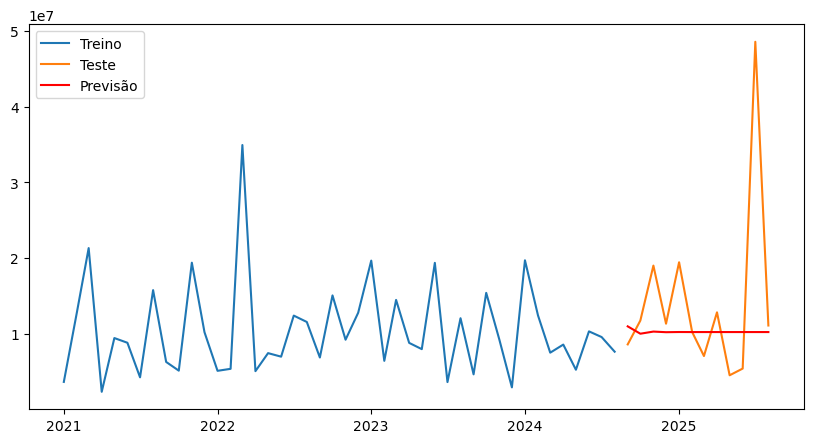

In [86]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(train.index, train["vendas"], label="Treino")
plt.plot(test.index, test["vendas"], label="Teste")
plt.plot(test.index, forecast, label="Previsão", color="red")
plt.legend()
plt.show()

In [94]:
# Treinamento do(s) modelo(s) com os dados fornecidos
model = SARIMAX(df["vendas"], order=(1,1,1), seasonal_order=(1,1,1,12))
fit = model.fit()

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [95]:
# Treinamento do(s) modelo(s) com os dados fornecidos
# Geração de previsões usando o modelo treinado
forecast = fit.get_forecast(steps=29)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [96]:
# Execução desta célula para análise ou preparação dos dados
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(1), periods=29, freq="MS")


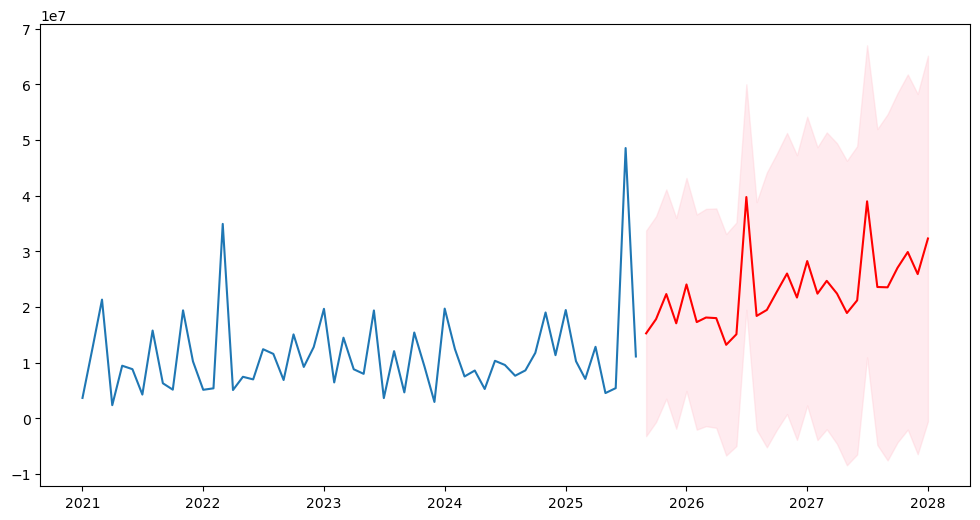

In [100]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(12,6))
plt.plot(df.index, df["vendas"], label="Histórico")
plt.plot(forecast_index, forecast_mean, label="Previsão (29 meses)", color="red")
plt.fill_between(forecast_index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color="pink", alpha=0.3)

In [101]:
# Execução desta célula para análise ou preparação dos dados
##==================================================================== Naive Forecast

In [102]:
# Importação de bibliotecas necessárias para análise e modelagem de séries temporais
# Geração de gráficos para visualização dos dados ou previsões
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# Leitura do arquivo CSV com os dados de vendas
# Agrupamento das vendas por mês
df = pd.read_csv(r"C:\Users\renet\Downloads\treinamentos_ia 5\resumo_vendas_regiao.csv", parse_dates=["data"])
df["data"] = df["data"].dt.to_period("M").dt.to_timestamp()
df = df.groupby("data").sum()
df = df.asfreq("MS")

In [104]:
# Execução desta célula para análise ou preparação dos dados
forecast_steps = 29

In [105]:
# Execução desta célula para análise ou preparação dos dados
# ----- Modelo Naive -----
# Último valor observado
last_value = df["vendas"].iloc[-1]

In [106]:
# Execução desta célula para análise ou preparação dos dados
# Criar série de previsão
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(1), periods=forecast_steps, freq="MS")
forecast = pd.Series([last_value]*forecast_steps, index=forecast_index)

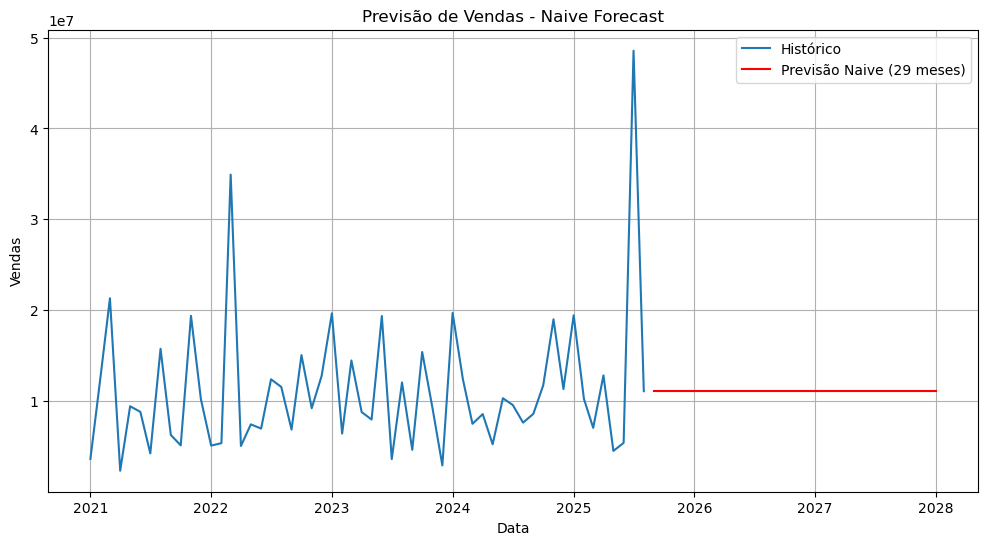

In [107]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(12,6))
plt.plot(df.index, df["vendas"], label="Histórico")
plt.plot(forecast.index, forecast, label="Previsão Naive (29 meses)", color="red")
plt.legend()
plt.title("Previsão de Vendas - Naive Forecast")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.show()

In [ ]:
# Execução desta célula para análise ou preparação dos dados
##==================================================================== Random Forest

In [108]:
# Importação de bibliotecas necessárias para análise e modelagem de séries temporais
# Geração de gráficos para visualização dos dados ou previsões
# Separação dos dados em treino e teste
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [109]:
# Leitura do arquivo CSV com os dados de vendas
# Agrupamento das vendas por mês
df = pd.read_csv(r"C:\Users\renet\Downloads\treinamentos_ia 5\resumo_vendas_regiao.csv", parse_dates=["data"])
df["data"] = df["data"].dt.to_period("M").dt.to_timestamp()
df = df.groupby("data").sum()
df = df.asfreq("MS")

In [111]:
# Execução desta célula para análise ou preparação dos dados
# 2️⃣ Criar features de lags
# Ex: usar vendas dos últimos 12 meses para prever o próximo
lags = 12
for i in range(1, lags+1):
    df[f"lag_{i}"] = df["vendas"].shift(i)

df = df.dropna()  # remover linhas com NaN por causa dos lags

In [112]:
# Separação dos dados em treino e teste
# 3️⃣ Separar treino e teste
X = df[[f"lag_{i}" for i in range(1, lags+1)]]
y = df["vendas"]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=12)  # últimos 12 meses como teste


In [113]:
# Treinamento do(s) modelo(s) com os dados fornecidos
# 4️⃣ Treinar Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [114]:
# Geração de previsões usando o modelo treinado
# 5️⃣ Previsão
y_pred = rf.predict(X_test)

In [115]:
# Impressão de resultados ou informações
# Avaliar
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 134215912355042.61


In [120]:
# Geração de previsões usando o modelo treinado
# 6️⃣ Previsão futura (29 meses à frente)
last_known = df["vendas"].iloc[-lags:].values.tolist()  # últimos 12 meses
future_preds = []

for _ in range(29):
    X_future = pd.DataFrame([last_known[-lags:]], columns=[f"lag_{i}" for i in range(1, lags+1)])
    pred = rf.predict(X_future)[0]
    future_preds.append(pred)
    last_known.append(pred)  # adicionar ao histórico para próximo passo

forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(1), periods=29, freq="MS")
forecast_series = pd.Series(future_preds, index=forecast_index)

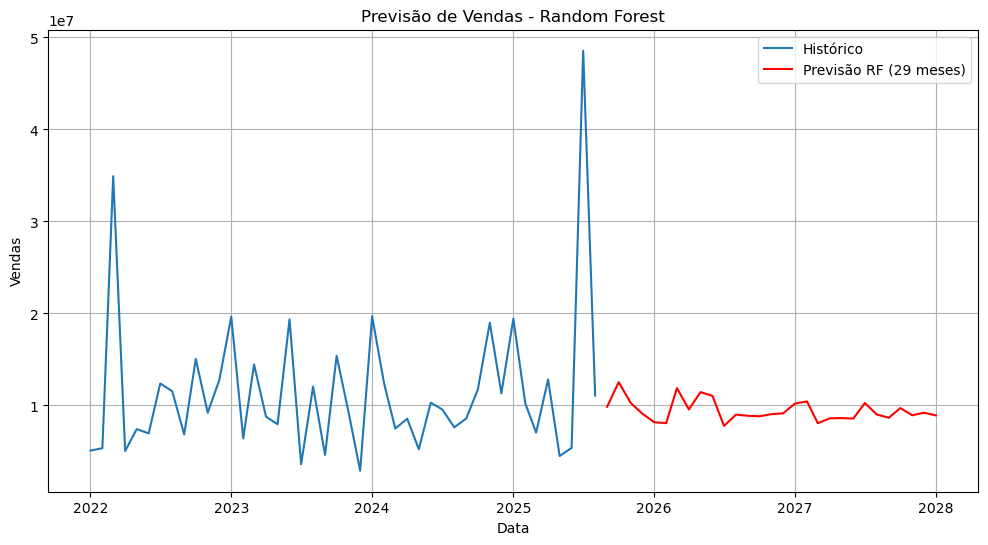

In [121]:
# Geração de gráficos para visualização dos dados ou previsões
# 7️⃣ Plotar resultados
plt.figure(figsize=(12,6))
plt.plot(df.index, df["vendas"], label="Histórico")
plt.plot(forecast_index, forecast_series, label="Previsão RF (29 meses)", color="red")
plt.legend()
plt.title("Previsão de Vendas - Random Forest")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.show()

In [ ]:
# Execução desta célula para análise ou preparação dos dados
##==================================================================== XGBoost

In [1]:
# Importação de bibliotecas necessárias para análise e modelagem de séries temporais
# Geração de gráficos para visualização dos dados ou previsões
# Separação dos dados em treino e teste
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Leitura do arquivo CSV com os dados de vendas
# Agrupamento das vendas por mês
# 1️⃣ Carregar e preparar os dados
df = pd.read_csv(r"C:\Users\renet\Downloads\treinamentos_ia 5\resumo_vendas_regiao.csv", parse_dates=["data"])
df["data"] = df["data"].dt.to_period("M").dt.to_timestamp()
df = df.groupby("data").sum()
df = df.asfreq("MS")

In [3]:
# Execução desta célula para análise ou preparação dos dados
lags = 12
for i in range(1, lags+1):
    df[f"lag_{i}"] = df["vendas"].shift(i)

df = df.dropna()  # remover linhas com NaN

In [4]:
# Separação dos dados em treino e teste
# 3️⃣ Separar treino e teste
X = df[[f"lag_{i}" for i in range(1, lags+1)]]
y = df["vendas"]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=12)


In [5]:
# Treinamento do(s) modelo(s) com os dados fornecidos
# 4️⃣ Treinar XGBoost
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [6]:
# Geração de previsões usando o modelo treinado
# Impressão de resultados ou informações
# 5️⃣ Previsão e avaliação
y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 138154224648450.23


In [8]:
# Geração de previsões usando o modelo treinado
# 6️⃣ Previsão futura (29 meses à frente)
last_known = df["vendas"].iloc[-lags:].values.tolist()
future_preds = []

for _ in range(29):
    # criar DataFrame com nomes das colunas
    X_future = pd.DataFrame([last_known[-lags:]], columns=[f"lag_{i}" for i in range(1, lags+1)])
    pred = xgb.predict(X_future)[0]
    future_preds.append(pred)
    last_known.append(pred)  # adicionar ao histórico para próximo passo

forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(1), periods=29, freq="MS")
forecast_series = pd.Series(future_preds, index=forecast_index)

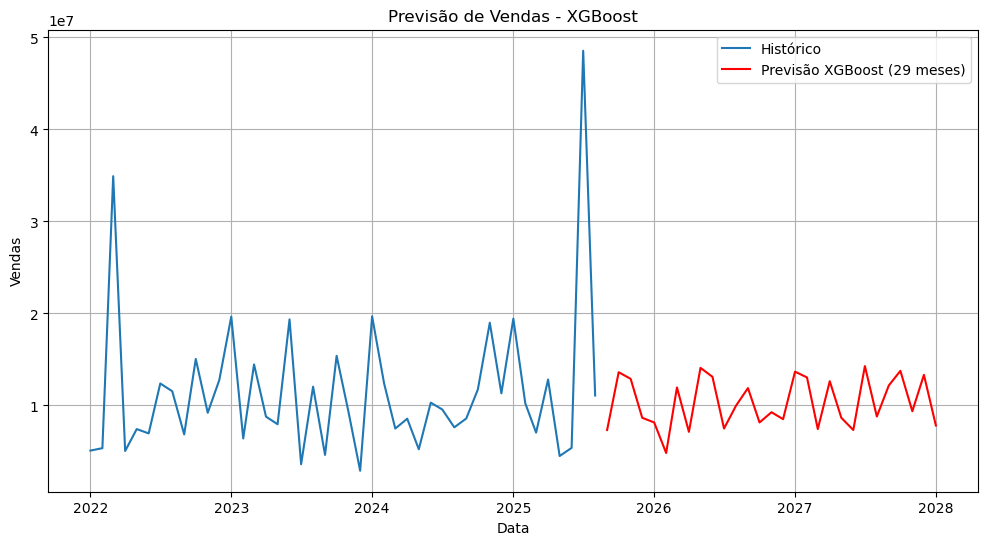

In [9]:
# Geração de gráficos para visualização dos dados ou previsões
# 7️⃣ Plotar resultados
plt.figure(figsize=(12,6))
plt.plot(df.index, df["vendas"], label="Histórico")
plt.plot(forecast_index, forecast_series, label="Previsão XGBoost (29 meses)", color="red")
plt.legend()
plt.title("Previsão de Vendas - XGBoost")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.show()

In [ ]:
# Execução desta célula para análise ou preparação dos dados


In [ ]:
# Execução desta célula para análise ou preparação dos dados
##==================================================================== POR REGIAO

In [9]:
# Importação de bibliotecas necessárias para análise e modelagem de séries temporais
# Geração de gráficos para visualização dos dados ou previsões
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
# Leitura do arquivo CSV com os dados de vendas
df = pd.read_csv(r"C:\Users\renet\Downloads\treinamentos_ia 5\resumo_vendas_regiao.csv")

In [11]:
# Conversão da coluna 'ds' para o formato de data
# Converter para datetime (tentando vários formatos)
df['date'] = pd.to_datetime(df['data'], errors='coerce', dayfirst=False)

# Se algumas datas ficarem NaT, tentar novamente assumindo formato brasileiro
mask = df['date'].isna()
df.loc[mask, 'date'] = pd.to_datetime(df.loc[mask, 'data'], errors='coerce', dayfirst=True)


In [12]:
# Agrupamento das vendas por mês
# Exibição das primeiras linhas do DataFrame para validação
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp('M')

df_month = (
    df.groupby(['regiao', 'month'], as_index=False)['vendas']
    .sum()
    .sort_values(['regiao', 'month'])
)

df_month.head()


,regiao,month,vendas
0,Argentina,2021-01-31,58967.34
1,Argentina,2021-02-28,6488907.68
2,Argentina,2021-03-31,578134.33
3,Argentina,2021-04-30,15936.60
4,Argentina,2021-05-31,19730.98


In [20]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "Argentina"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)


D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


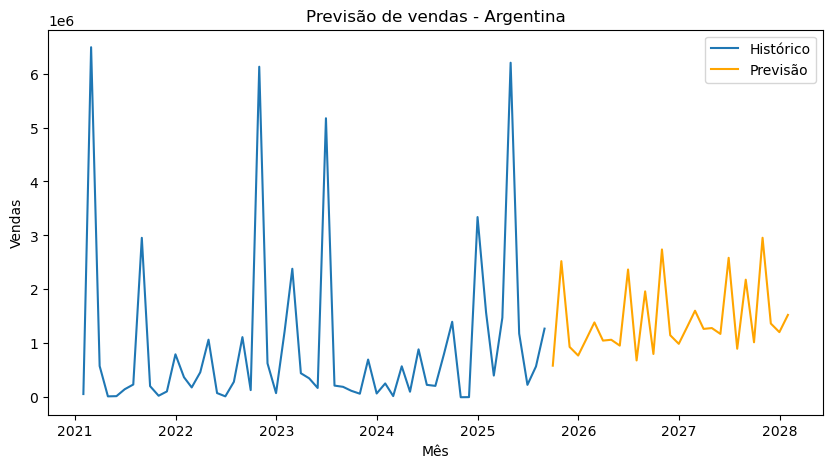

In [21]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()


In [22]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "CHILE"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


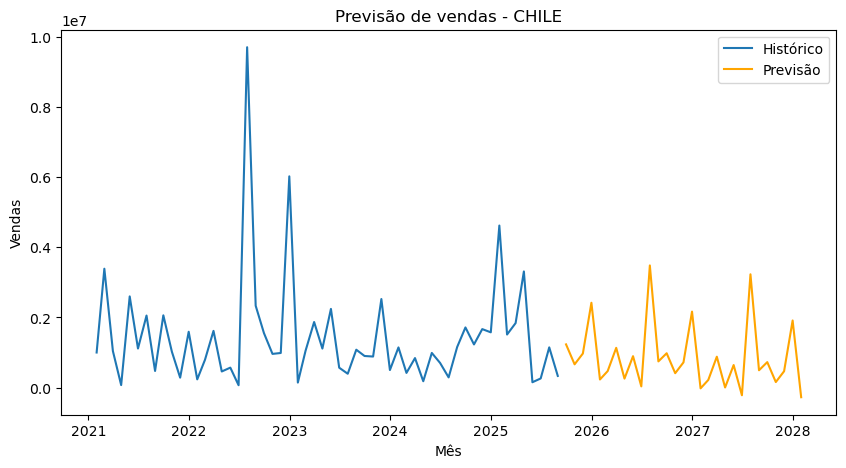

In [23]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [24]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "CENTROAMERICA"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


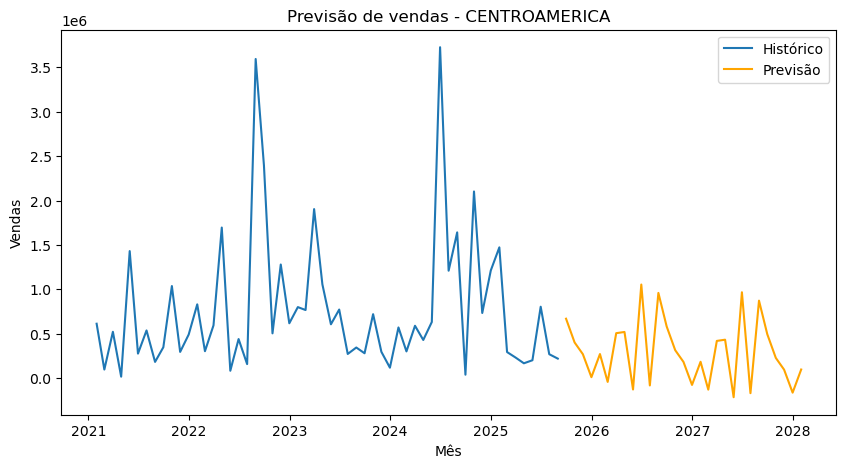

In [25]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [26]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "PERU"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


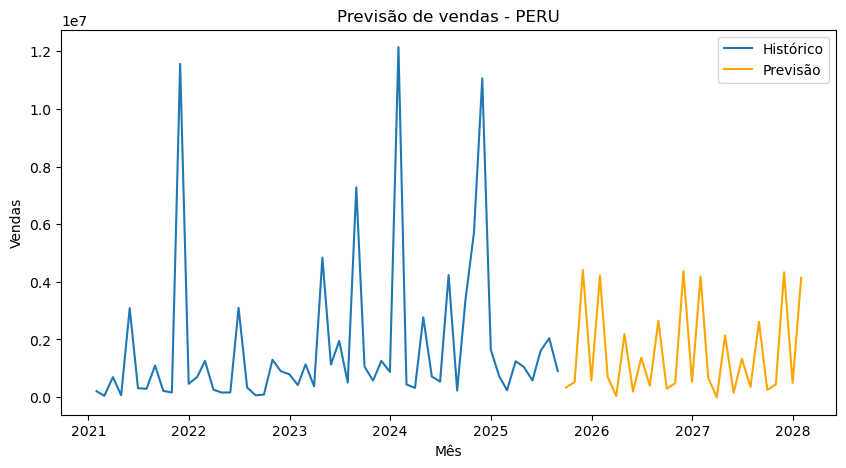

In [27]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [28]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "SOUTH AMERICA"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


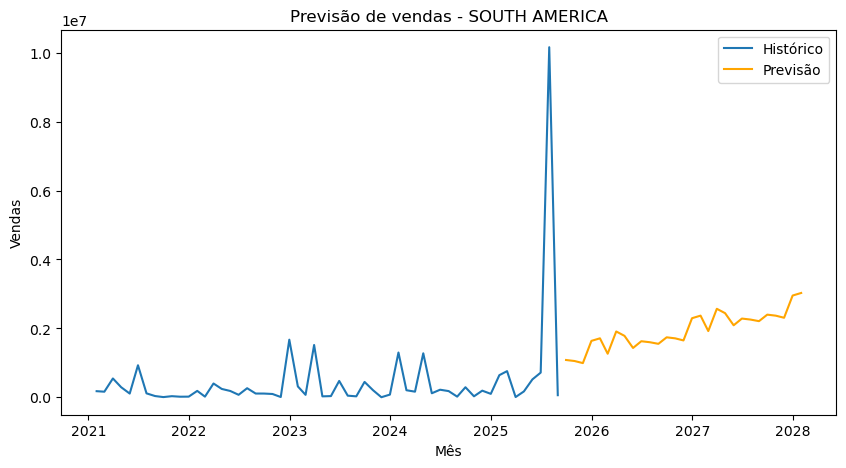

In [29]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [30]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "S.R.L"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


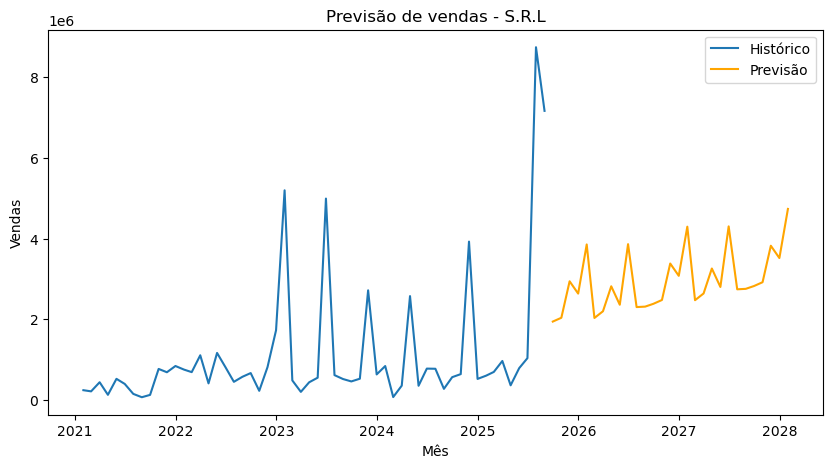

In [31]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [32]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "PANAMA S.A"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


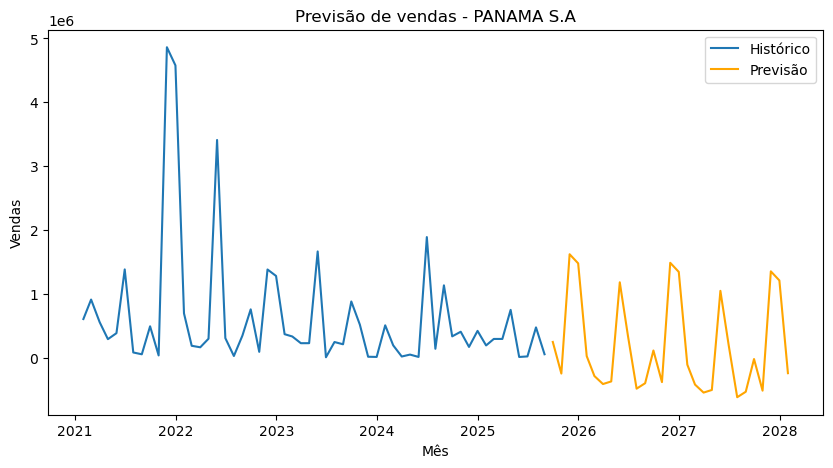

In [33]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [34]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "COLOMBIA"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


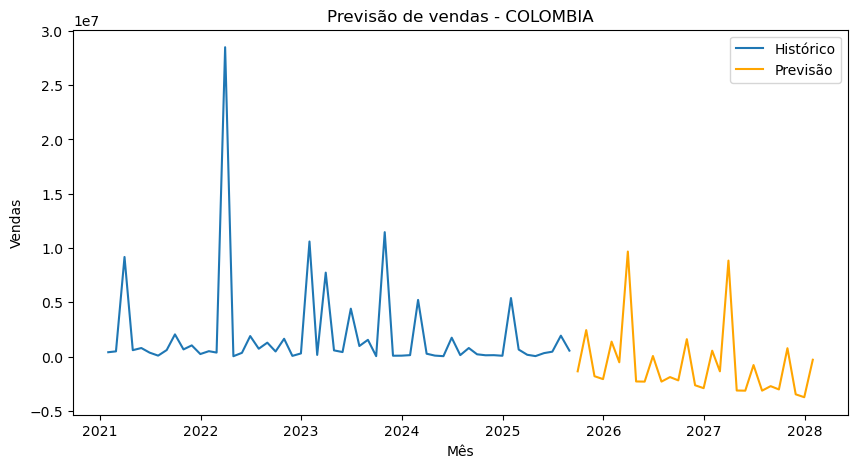

In [35]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [36]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "URUGUAY"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


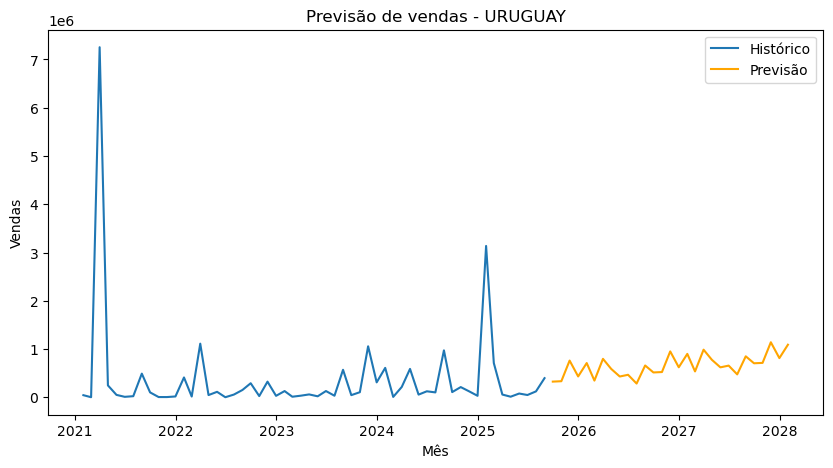

In [37]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [38]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "MEXICO"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


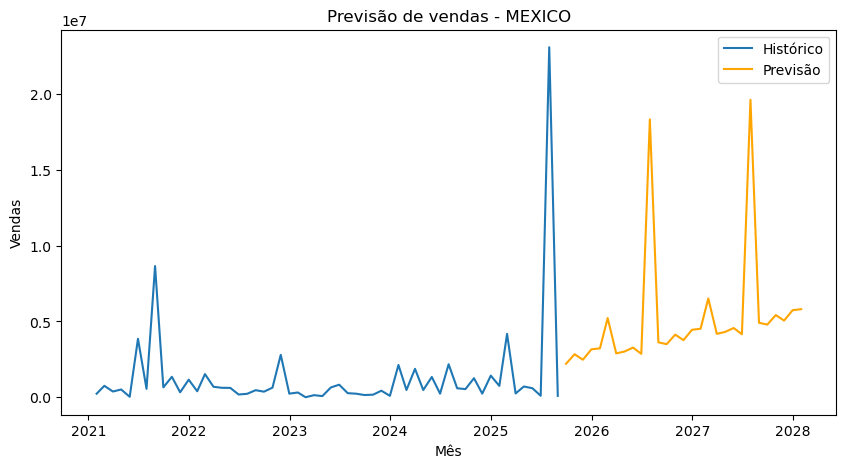

In [39]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [40]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "SHANGHAI"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


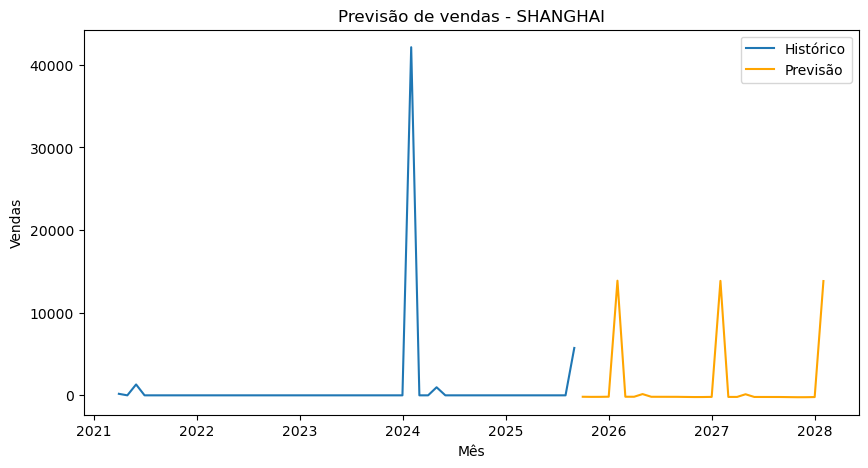

In [41]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [42]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "SAINT LUCIA"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


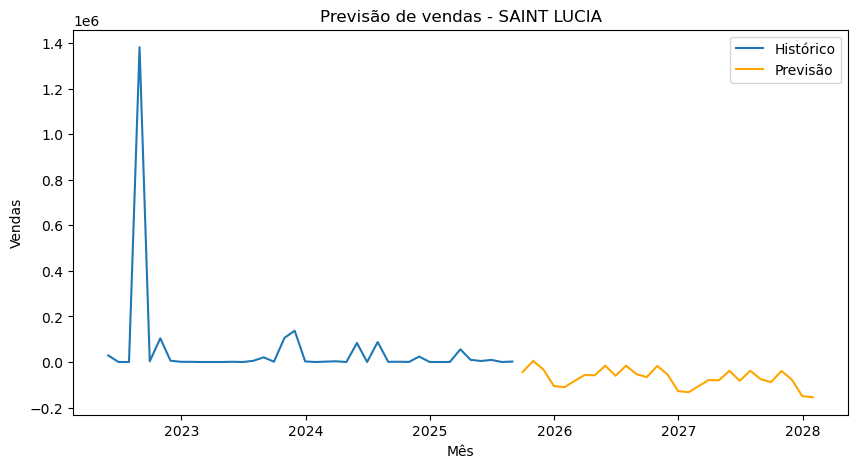

In [43]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [44]:
# Treinamento do(s) modelo(s) com os dados fornecidos
region = "PORTUGAL"   # escolha a região que quer prever

# Filtrar a série
ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

# Criar modelo Holt-Winters (com sazonalidade de 12 meses se tiver histórico suficiente)
if len(ts) >= 24:
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
else:
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)

fit = model.fit(optimized=True)

# Fazer previsão de 29 meses
forecast = fit.forecast(29)

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


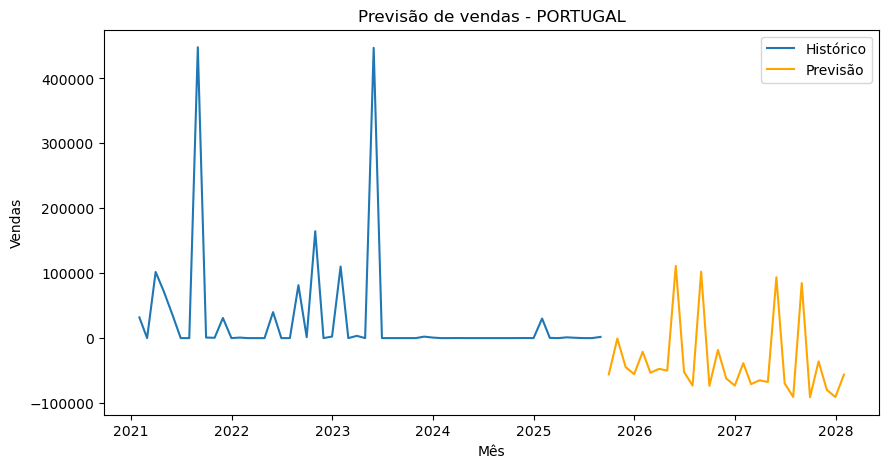

In [45]:
# Geração de gráficos para visualização dos dados ou previsões
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Histórico")
plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
plt.title(f"Previsão de vendas - {region}")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [ ]:
# Execução desta célula para análise ou preparação dos dados
#---------------------------------------
#---------------------------------------
#---------------------------------------

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


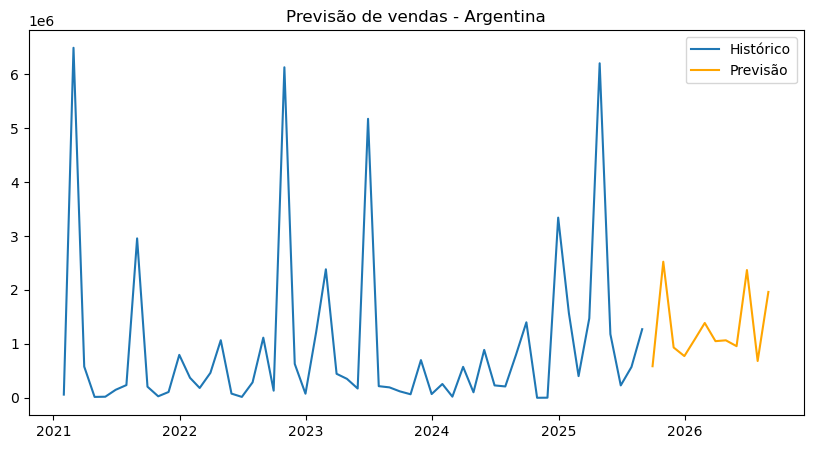

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


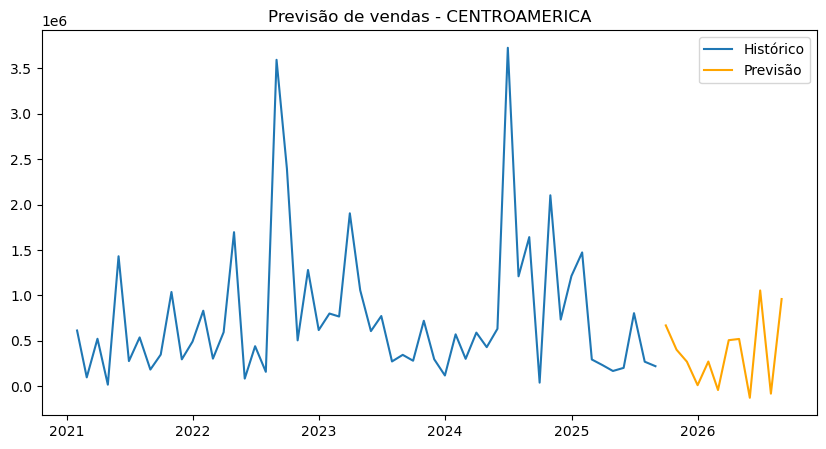

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


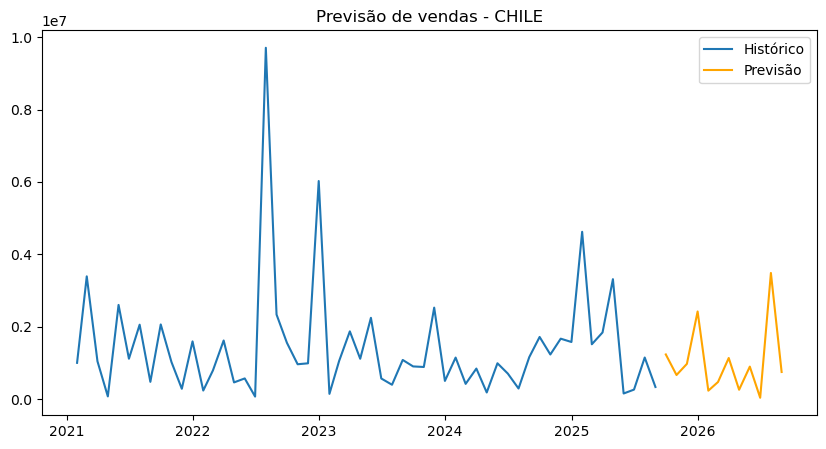

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


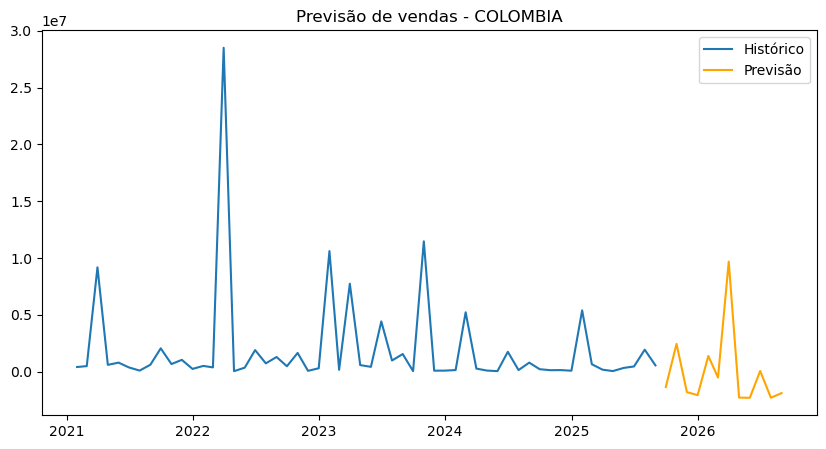

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


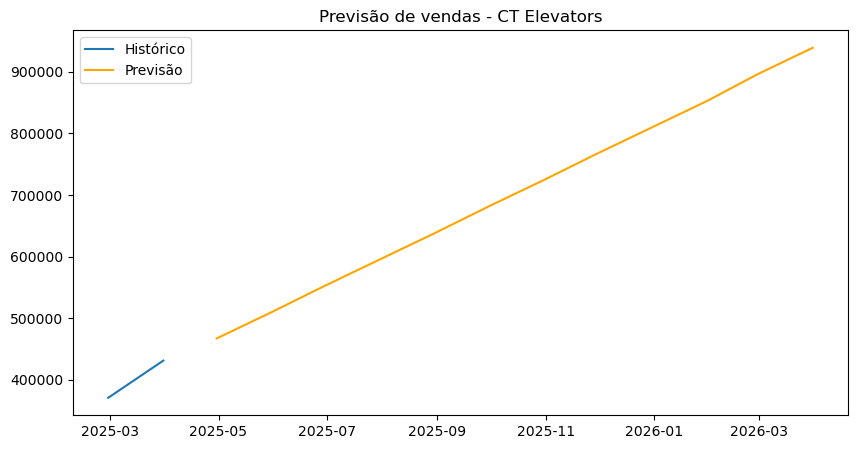

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


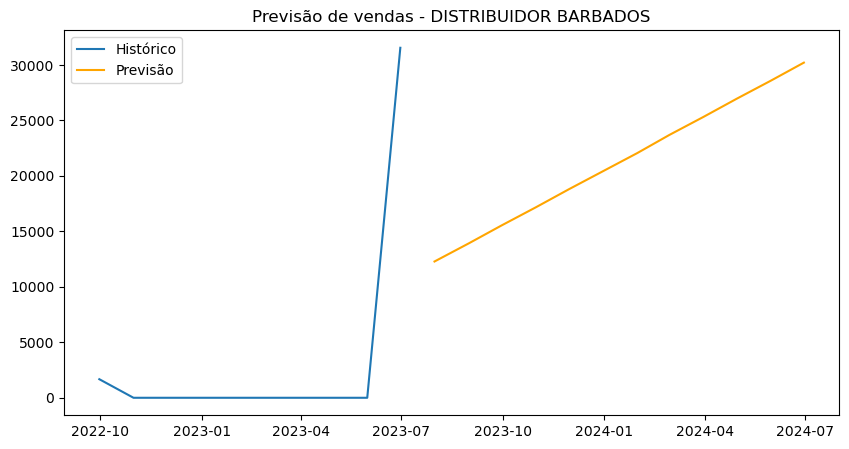

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


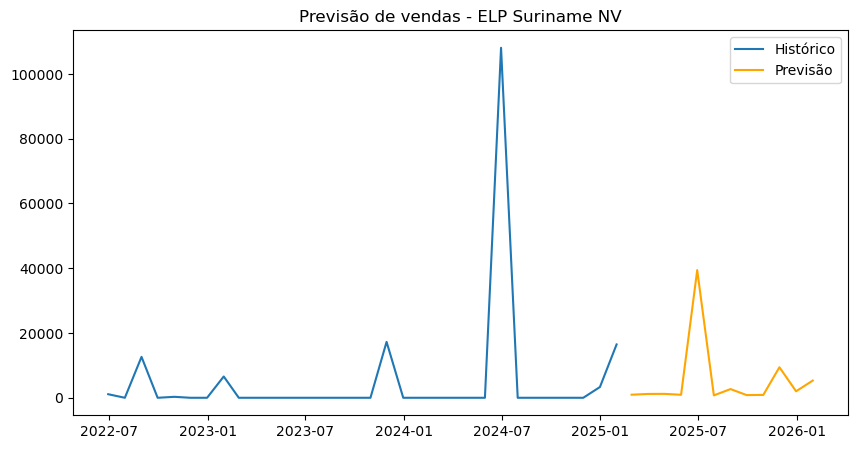

Erro ao modelar região GPV Suzhou Ltd: index 1 is out of bounds for axis 0 with size 1
Erro ao modelar região Ganamerk Group SA: index 1 is out of bounds for axis 0 with size 1


D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


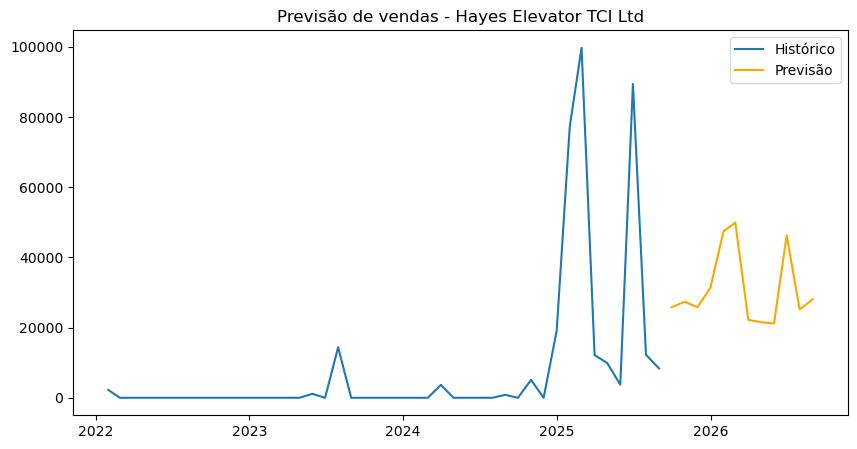

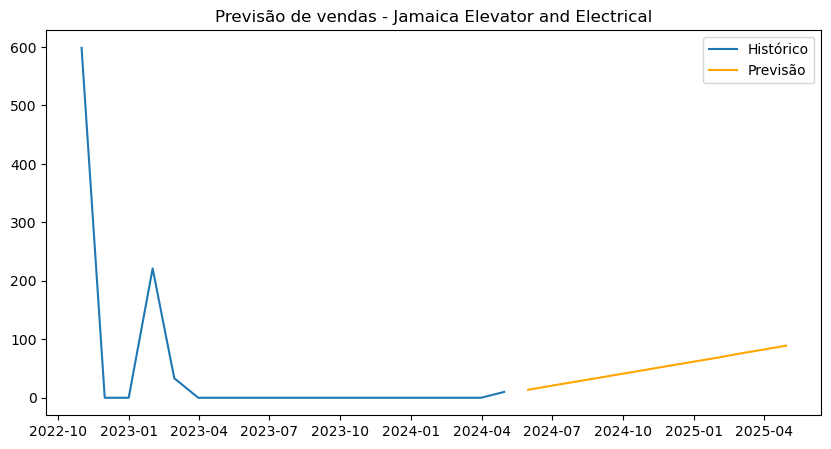

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


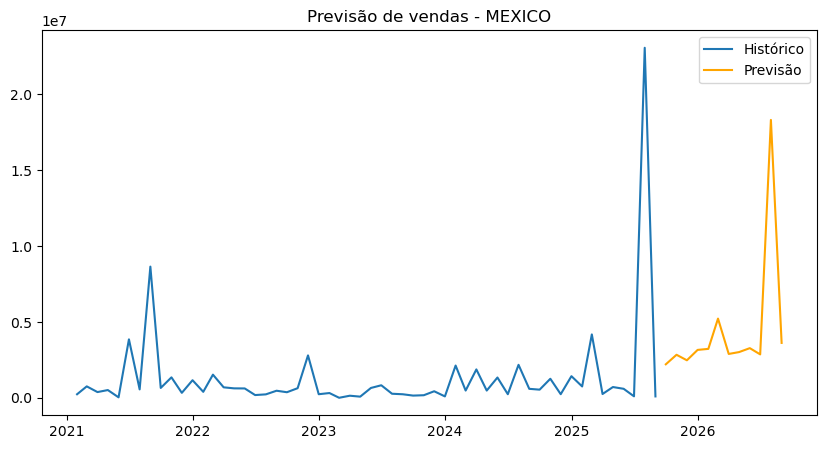

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


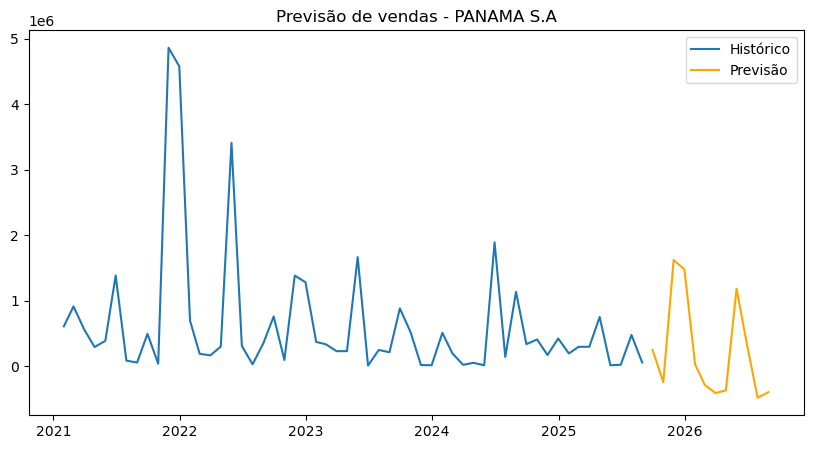

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


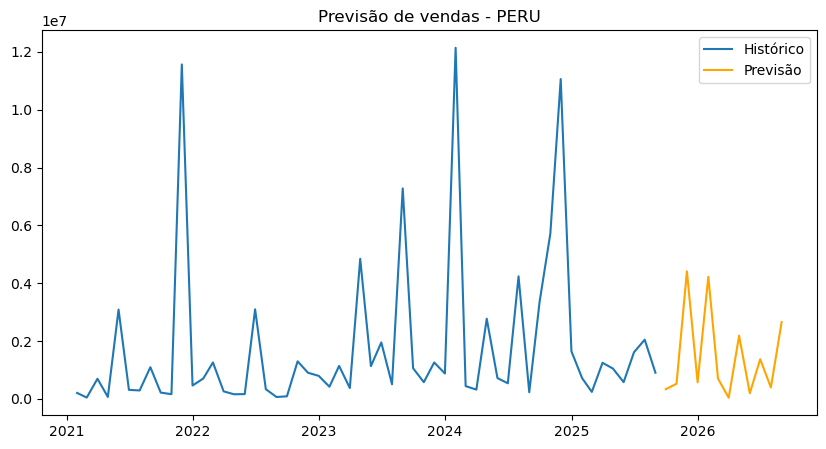

D:\Projetos\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


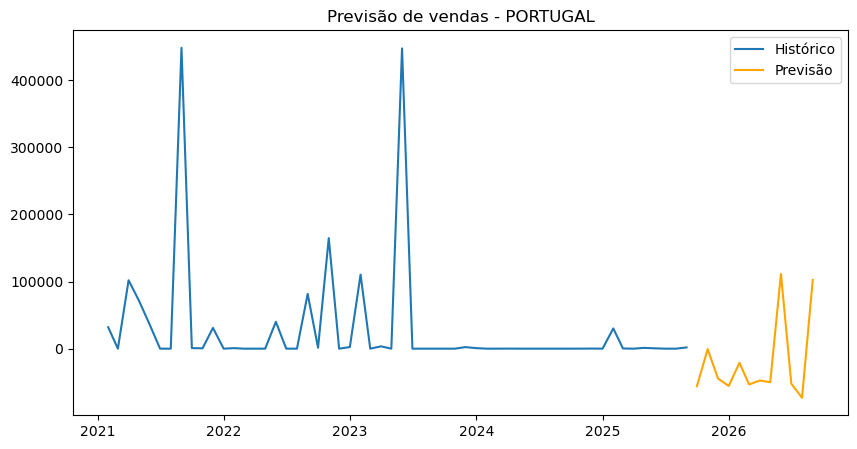

In [47]:
# Geração de gráficos para visualização dos dados ou previsões
# Treinamento do(s) modelo(s) com os dados fornecidos
# Impressão de resultados ou informações
regions = df_month['regiao'].unique()

for region in regions[:15]:  # troque 5 pelo número de regiões que quer ver
    ts = df_month[df_month['regiao'] == region].set_index('month')['vendas'].asfreq('M').fillna(0)

    try:
        if len(ts) >= 24:
            model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
        else:
            model = ExponentialSmoothing(ts, trend='add', seasonal=None)
        fit = model.fit(optimized=True)
        forecast = fit.forecast(12)

        plt.figure(figsize=(10,5))
        plt.plot(ts.index, ts.values, label="Histórico")
        plt.plot(forecast.index, forecast.values, label="Previsão", color="orange")
        plt.title(f"Previsão de vendas - {region}")
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"Erro ao modelar região {region}: {e}")


In [ ]:
# Execução desta célula para análise ou preparação dos dados
